# IS670 Assignment 1_Vishakha Sonmore
*italicized text*

## **1. INTRODUCTION**
This assignment aims to assess comprehension of fundamental data mining principles, specifically in addressing classification problems through the utilization of decision trees.

Decision trees play a pivotal role in data analytics and business intelligence, making this assignment a foundational step towards mastering data mining and machine learning (ML) concepts. The task entails employing Google Colab to execute a data mining analysis.

Our objective is to analyze a provided dataset containing information regarding customer churn. Customer churn, also referred to as customer attrition or turnover, denotes the scenario where customers discontinue their association with a company or business entity. Churn occurrences may stem from various factors such as dissatisfaction with the product or service, competitive offers from rivals, alterations in personal or business requirements, or lack of engagement. In fiercely competitive markets, customer retention becomes imperative for survival.

The study focuses on exploring customer departures from a business based on their attributed characteristics. The goal is to enable companies to identify potential churners using available data, thereby facilitating prompt action to retain these customers or make informed decisions. Additionally, it aids in comprehending the underlying drivers of customer churn, enabling corrective measures to enhance overall customer loyalty.

## 1.1. Data Understanding
Understand the telecom domain and the problem of predicting customer churn. Review relevant literature to gain insights into factors that may influence churn in this industry.



In [18]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Import libraries
import pandas as pd
import seaborn as sns

In [32]:
# Read data
data = pd.read_csv('/content/drive/MyDrive/IS670_Vishakha/CutomerChurnData.csv')
data

,cust_id,region,tenure,age,marital,address,income,ed,employ,retire,...,internet,callid,callwait,forward,confer,ebill,loglong,lninc,custcat,churn
0,C00124,R2,13,44,Y,9,64,E4,5,N,...,N,N,N,Y,N,N,1.308,4.159,C1,Y
1,C00125,R3,68,52,Y,24,116,E1,29,N,...,N,Y,Y,N,Y,N,2.899,4.754,C3,N
2,C00126,R2,23,30,Y,9,30,E1,2,N,...,N,Y,N,Y,Y,N,1.841,3.401,C3,N
3,C00127,R3,45,22,Y,2,19,E2,4,N,...,Y,N,Y,N,N,Y,2.389,2.944,C2,Y
4,C00128,R3,45,59,Y,7,166,E4,31,N,...,N,Y,Y,Y,Y,N,2.277,5.112,C3,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C01119,R1,50,43,N,6,27,E3,4,N,...,N,Y,Y,Y,Y,N,2.708,3.296,C3,N
996,C01120,R1,34,52,Y,2,106,E2,19,N,...,Y,Y,N,Y,Y,N,1.599,4.663,C3,N
997,C01121,R1,15,46,Y,17,63,E5,1,N,...,Y,Y,N,Y,Y,Y,1.308,4.143,C4,Y
998,C01122,R1,7,34,N,2,22,E5,5,N,...,N,N,N,N,N,N,1.537,3.091,C1,N


In [25]:
# Examine the number of rows and cols
customer.shape

(1000, 39)

In [26]:
# Show the head rows of a data frame
customer.head()

,cust_id,region,tenure,age,marital,address,income,ed,employ,retire,...,internet,callid,callwait,forward,confer,ebill,loglong,lninc,custcat,churn
0,C00124,R2,13,44,Y,9,64,E4,5,N,...,N,N,N,Y,N,N,1.308,4.159,C1,Y
1,C00125,R3,68,52,Y,24,116,E1,29,N,...,N,Y,Y,N,Y,N,2.899,4.754,C3,N
2,C00126,R2,23,30,Y,9,30,E1,2,N,...,N,Y,N,Y,Y,N,1.841,3.401,C3,N
3,C00127,R3,45,22,Y,2,19,E2,4,N,...,Y,N,Y,N,N,Y,2.389,2.944,C2,Y
4,C00128,R3,45,59,Y,7,166,E4,31,N,...,N,Y,Y,Y,Y,N,2.277,5.112,C3,N


In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [33]:
# Load the data

data = pd.read_csv('/content/drive/MyDrive/IS670_Vishakha/CutomerChurnData.csv')
data

,cust_id,region,tenure,age,marital,address,income,ed,employ,retire,...,internet,callid,callwait,forward,confer,ebill,loglong,lninc,custcat,churn
0,C00124,R2,13,44,Y,9,64,E4,5,N,...,N,N,N,Y,N,N,1.308,4.159,C1,Y
1,C00125,R3,68,52,Y,24,116,E1,29,N,...,N,Y,Y,N,Y,N,2.899,4.754,C3,N
2,C00126,R2,23,30,Y,9,30,E1,2,N,...,N,Y,N,Y,Y,N,1.841,3.401,C3,N
3,C00127,R3,45,22,Y,2,19,E2,4,N,...,Y,N,Y,N,N,Y,2.389,2.944,C2,Y
4,C00128,R3,45,59,Y,7,166,E4,31,N,...,N,Y,Y,Y,Y,N,2.277,5.112,C3,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C01119,R1,50,43,N,6,27,E3,4,N,...,N,Y,Y,Y,Y,N,2.708,3.296,C3,N
996,C01120,R1,34,52,Y,2,106,E2,19,N,...,Y,Y,N,Y,Y,N,1.599,4.663,C3,N
997,C01121,R1,15,46,Y,17,63,E5,1,N,...,Y,Y,N,Y,Y,Y,1.308,4.143,C4,Y
998,C01122,R1,7,34,N,2,22,E5,5,N,...,N,N,N,N,N,N,1.537,3.091,C1,N


In [35]:
# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
categorical_cols = data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if col != 'churn':
        data[col] = label_encoder.fit_transform(data[col])
    else:
        # Convert 'churn' column to binary values
        data['churn'] = data['churn'].map({'Y': 1, 'N': 0})

In [36]:
# Display the cleaned data
print(data.head())

   cust_id  region  tenure  age  marital  address  income  ed  employ  retire  \
0        0       1      13   44        1        9      64   3       5       0   
1        1       2      68   52        1       24     116   0      29       0   
2        2       1      23   30        1        9      30   0       2       0   
3        3       2      45   22        1        2      19   1       4       0   
4        4       2      45   59        1        7     166   3      31       0   

   ...  internet  callid  callwait  forward  confer  ebill  loglong  lninc  \
0  ...         0       0         0        1       0      0    1.308  4.159   
1  ...         0       1         1        0       1      0    2.899  4.754   
2  ...         0       1         0        1       1      0    1.841  3.401   
3  ...         1       0         1        0       0      1    2.389  2.944   
4  ...         0       1         1        1       1      0    2.277  5.112   

   custcat  churn  
0        0      1  
1   

In [37]:
## 2. Feature Selection

from sklearn.feature_selection import SelectKBest, chi2

# Separate features and target variable
X = data.drop(columns=['churn'])
y = data['churn']

In [46]:
# Select top 10 features based on chi-squared test
selector = SelectKBest(score_func=chi2, k=5)
X_selected = selector.fit_transform(X, y)

In [47]:
# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print('Selected Features:', selected_features)

Selected Features: Index(['tenure', 'longten', 'tollten', 'cardten', 'wireten'], dtype='object')


In [48]:
## 3. Splitting Data

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

In [49]:
## 4. Building the Decision Tree

from sklearn.tree import DecisionTreeClassifier

# Train the decision tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [50]:
## 5. Model Evaluation

from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = clf.predict(X_test)

In [51]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9333333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       233
           1       0.83      0.88      0.86        67

    accuracy                           0.93       300
   macro avg       0.90      0.91      0.91       300
weighted avg       0.94      0.93      0.93       300



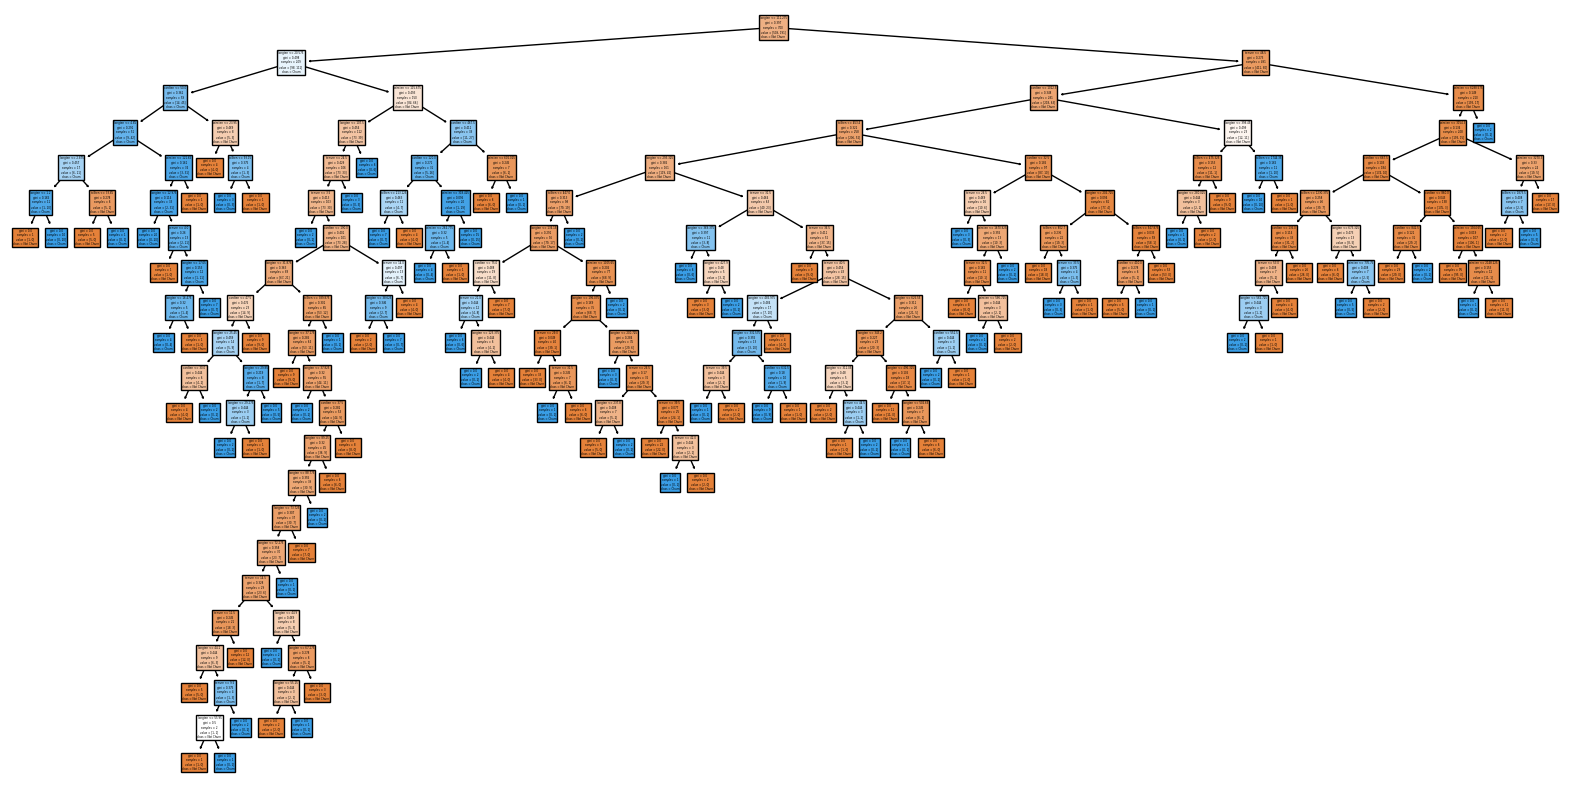

In [55]:
## 6. Visualization

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=selected_features, class_names=['Not Churn', 'Churn'])
plt.show()